# Import Library

In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn import preprocessing

# Read Data

In [ ]:
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Feature Extraction

In [ ]:
data['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [ ]:
df = pd.concat([data, data['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)

In [ ]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,0,1
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


> Categorizing Data

In [ ]:
df = df.rename(columns={0: 'BloodPressure Systolic Value', 1: 'BloodPressure Diastolic Value'})

In [ ]:
df['Sleep Disorder'] = np.where(df['Sleep Disorder'] == 'Sleep Apnea', 'Sleep Apnea', 'Not Sleep Apnea')

In [ ]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure Systolic Value,BloodPressure Diastolic Value
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,Not Sleep Apnea,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Not Sleep Apnea,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Not Sleep Apnea,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


In [ ]:
# Cast string to integer

df['BloodPressure Systolic Value'] = df['BloodPressure Systolic Value'].astype(float)
df['BloodPressure Diastolic Value'] = df['BloodPressure Diastolic Value'].astype(float)

In [ ]:
sleep_disorder_counts = df.groupby('Occupation')['Sleep Disorder'].value_counts().unstack().fillna(0)
print(sleep_disorder_counts)

Sleep Disorder        Not Sleep Apnea  Sleep Apnea
Occupation                                        
Accountant                       37.0          0.0
Doctor                           67.0          4.0
Engineer                         62.0          1.0
Lawyer                           44.0          3.0
Manager                           1.0          0.0
Nurse                            12.0         61.0
Sales Representative              0.0          2.0
Salesperson                      31.0          1.0
Scientist                         2.0          2.0
Software Engineer                 4.0          0.0
Teacher                          36.0          4.0


In [ ]:
sleep_disorder_by_bmi_counts = df.groupby('BMI Category')['Sleep Disorder'].value_counts().unstack().fillna(0)
print(sleep_disorder_by_bmi_counts)

Sleep Disorder  Not Sleep Apnea  Sleep Apnea
BMI Category                                
Normal                      190            5
Normal Weight                19            2
Obese                         4            6
Overweight                   83           65


# Preprocessing

> Ordinal Encoding

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure Systolic Value,BloodPressure Diastolic Value
0,1,1,27,9,6.1,6,42,6,3,77,4200,0,126.0,83.0
1,2,1,28,1,6.2,6,60,8,0,75,10000,0,125.0,80.0
2,3,1,28,1,6.2,6,60,8,0,75,10000,0,125.0,80.0
3,4,1,28,6,5.9,4,30,8,2,85,3000,1,140.0,90.0
4,5,1,28,6,5.9,4,30,8,2,85,3000,1,140.0,90.0


> Normalizing Numeric Data

In [ ]:
num_col = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
           'Heart Rate', 'Daily Steps', 'BloodPressure Systolic Value', 'BloodPressure Diastolic Value']

In [ ]:
scaler = MinMaxScaler()
df[num_col] = scaler.fit_transform(df[num_col])

In [ ]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure Systolic Value,BloodPressure Diastolic Value
0,1,1,0.00000,9,0.111111,0.4,0.20,0.6,3,0.571429,0.171429,0,0.407407,0.40
1,2,1,0.03125,1,0.148148,0.4,0.50,1.0,0,0.476190,1.000000,0,0.370370,0.25
2,3,1,0.03125,1,0.148148,0.4,0.50,1.0,0,0.476190,1.000000,0,0.370370,0.25
3,4,1,0.03125,6,0.037037,0.0,0.00,1.0,2,0.952381,0.000000,1,0.925926,0.75
4,5,1,0.03125,6,0.037037,0.0,0.00,1.0,2,0.952381,0.000000,1,0.925926,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,1.00000,5,0.851852,1.0,0.75,0.0,3,0.142857,0.571429,1,0.925926,1.00
370,371,0,1.00000,5,0.814815,1.0,0.75,0.0,3,0.142857,0.571429,1,0.925926,1.00
371,372,0,1.00000,5,0.851852,1.0,0.75,0.0,3,0.142857,0.571429,1,0.925926,1.00
372,373,0,1.00000,5,0.851852,1.0,0.75,0.0,3,0.142857,0.571429,1,0.925926,1.00


# Visualization

In [ ]:
df = df.drop(columns=['Person ID'])

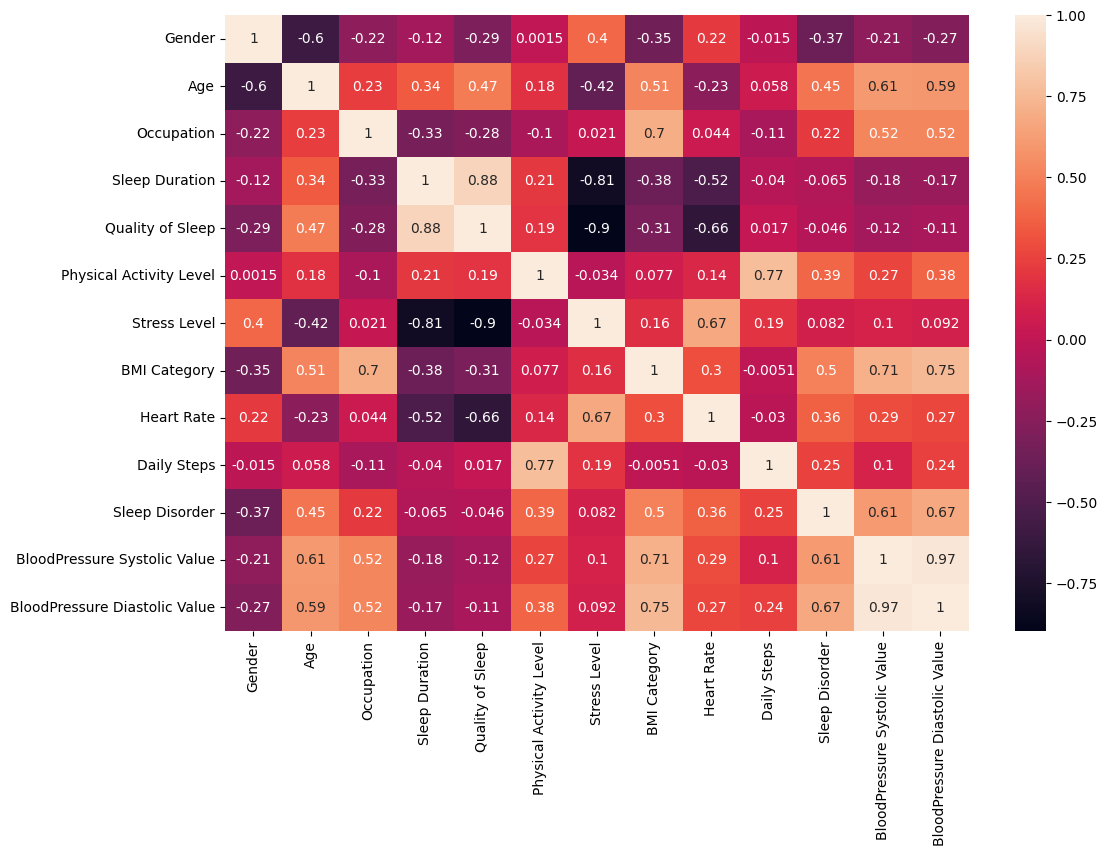

In [ ]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sb.heatmap(data = corr_matrix, annot = True)
plt.show()

In [ ]:
# check null value at df
df.isnull().sum()

,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Heart Rate,0
Daily Steps,0


# Split Data

In [ ]:
X = df.drop(['Sleep Disorder'], axis=1)
y = df['Sleep Disorder']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Hyperparamter Tuning using GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
}

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

In [ ]:
grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [ ]:
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

In [ ]:
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print("Best Parameters:", best_params)
# print("Classification Report:\n", classification_rep)

# Evaluate the best model on the training set
y_pred_train = best_rf_model.predict(X_train)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}


# Build Model

In [ ]:
rf_model = RandomForestClassifier(
    random_state=42,
    criterion="gini",
    max_depth=10,
    n_estimators=100,
    min_samples_split=2,
    min_samples_leaf=1,
    )

rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
y_train.value_counts()

,count
Sleep Disorder,
0,237
1,62


In [ ]:
y_train_resampled.value_counts()


,count
Sleep Disorder,
0,237
1,237


In [ ]:
feature_importances = rf_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


In [ ]:
feature_importance_df

,Feature,Importance
10,BloodPressure Systolic Value,0.248753
11,BloodPressure Diastolic Value,0.193096
2,Occupation,0.112981
1,Age,0.103718
5,Physical Activity Level,0.083534
8,Heart Rate,0.066325
4,Quality of Sleep,0.052061
7,BMI Category,0.051289
9,Daily Steps,0.029345
3,Sleep Duration,0.026313


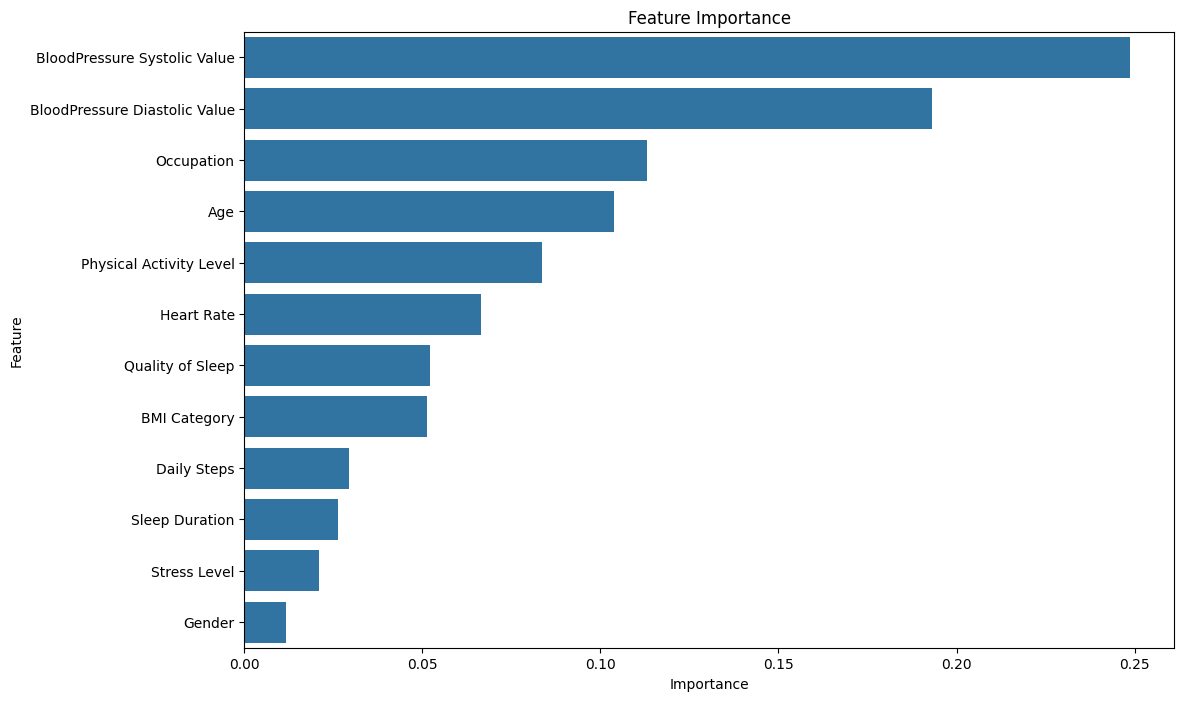

In [ ]:
plt.figure(figsize=(12, 8))
sb.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [ ]:
features_to_keep = list(feature_importance_df['Feature'])

# **All Feature with SMOTE**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

features_to_keep_all_feature_with_smote = features_to_keep.copy()

# Update dataset dengan fitur yang ada
X_train_reduced = X_train_resampled[features_to_keep_all_feature_with_smote]
X_test_reduced = X_test[features_to_keep_all_feature_with_smote]

# Latih model dengan semua fitur
rf_model.fit(X_train_reduced, y_train_resampled)

# Evaluasi model pada set uji
y_pred_test = rf_model.predict(X_test_reduced)
accuracy_test = accuracy_score(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

# Evaluasi model pada set latih
y_pred_train = rf_model.predict(X_train_reduced)
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)

# Output hasil
print(f"Number of Features: {len(features_to_keep_all_feature_with_smote)}")
print(f"Features: {features_to_keep_all_feature_with_smote}")
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)
print("Test Classification Report:\n", classification_rep_test)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_test)
print("ROC-AUC Score:", roc_auc)

# Sekarang mulai pengurangan fitur
min_features_to_retain = 5

while len(features_to_keep_all_feature_with_smote) > min_features_to_retain:
    # Hapus fitur yang paling tidak penting
    features_to_keep_all_feature_with_smote.pop(-1)

    # Update dataset dengan fitur yang tersisa
    X_train_reduced = X_train_resampled[features_to_keep_all_feature_with_smote]
    X_test_reduced = X_test[features_to_keep_all_feature_with_smote]

    # Latih model dengan fitur yang tersisa
    rf_model.fit(X_train_reduced, y_train_resampled)

    # Evaluasi model pada set uji
    y_pred_test = rf_model.predict(X_test_reduced)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    classification_rep_test = classification_report(y_test, y_pred_test)

    # Evaluasi model pada set latih
    y_pred_train = rf_model.predict(X_train_reduced)
    accuracy_train = accuracy_score(y_train_resampled, y_pred_train)

    # Output hasil
    print(f"Number of Features: {len(features_to_keep_all_feature_with_smote)}")
    print(f"Features: {features_to_keep_all_feature_with_smote}")
    print("Train Accuracy:", accuracy_train)
    print("Test Accuracy:", accuracy_test)
    print("Test Classification Report:\n", classification_rep_test)

    # ROC-AUC Score
    roc_auc = roc_auc_score(y_test, y_pred_test)
    print("ROC-AUC Score:", roc_auc)



Number of Features: 12
Features: ['BloodPressure Systolic Value', 'BloodPressure Diastolic Value', 'Occupation', 'Age', 'Physical Activity Level', 'Heart Rate', 'Quality of Sleep', 'BMI Category', 'Daily Steps', 'Sleep Duration', 'Stress Level', 'Gender']
Train Accuracy: 0.9767932489451476
Test Accuracy: 0.9066666666666666
Test Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94        59
           1       0.85      0.69      0.76        16

    accuracy                           0.91        75
   macro avg       0.88      0.83      0.85        75
weighted avg       0.90      0.91      0.90        75

ROC-AUC Score: 0.8268008474576272
Number of Features: 11
Features: ['BloodPressure Systolic Value', 'BloodPressure Diastolic Value', 'Occupation', 'Age', 'Physical Activity Level', 'Heart Rate', 'Quality of Sleep', 'BMI Category', 'Daily Steps', 'Sleep Duration', 'Stress Level']
Train Accuracy: 0.9767932489451476
Test

In [ ]:
features_to_keep

['BloodPressure Systolic Value',
 'BloodPressure Diastolic Value',
 'Occupation',
 'Age',
 'Physical Activity Level',
 'Heart Rate',
 'Quality of Sleep',
 'BMI Category',
 'Daily Steps',
 'Sleep Duration',
 'Stress Level',
 'Gender']

In [ ]:
best_model_feature = ['BloodPressure Systolic Value', 'BloodPressure Diastolic Value', 'Occupation', 'Age', 'Physical Activity Level', 'Heart Rate']

# **Without Occupation**

In [ ]:
features_to_keep_without_occupation = best_model_feature.copy()

# Remove Occupation feature from features_to_keep
features_to_keep_without_occupation.remove('Occupation')

# Update the dataset with the remaining features
X_train_reduced = X_train_resampled[features_to_keep_without_occupation]
X_test_reduced = X_test[features_to_keep_without_occupation]

# Train the model on the reduced feature set
rf_model.fit(X_train_reduced, y_train_resampled)

# Evaluate the model on the test set
y_pred_test = rf_model.predict(X_test_reduced)
accuracy_test = accuracy_score(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

# Evaluate the model on the train set
y_pred_train = rf_model.predict(X_train_reduced)
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)

# Output the results
print(f"Number of Features: {len(features_to_keep_without_occupation)}")
print(f"Features: {features_to_keep_without_occupation}")
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)
print("Test Classification Report:\n", classification_rep_test)

y_pred = best_rf_model.predict(X_test)

# # ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_test)
print("ROC-AUC Score:", roc_auc)

Number of Features: 5
Features: ['BloodPressure Systolic Value', 'BloodPressure Diastolic Value', 'Age', 'Physical Activity Level', 'Heart Rate']
Train Accuracy: 0.9767932489451476
Test Accuracy: 0.9066666666666666
Test Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94        59
           1       0.85      0.69      0.76        16

    accuracy                           0.91        75
   macro avg       0.88      0.83      0.85        75
weighted avg       0.90      0.91      0.90        75

ROC-AUC Score: 0.8268008474576272


# **Without Physical Activity Level**

In [ ]:
features_to_keep_without_physical_activity_level = best_model_feature.copy()

# Remove Occupation feature from features_to_keep
features_to_keep_without_physical_activity_level.remove('Physical Activity Level')

# Update the dataset with the remaining features
X_train_reduced = X_train_resampled[features_to_keep_without_physical_activity_level]
X_test_reduced = X_test[features_to_keep_without_physical_activity_level]

# Train the model on the reduced feature set
rf_model.fit(X_train_reduced, y_train_resampled)

# Evaluate the model on the test set
y_pred_test = rf_model.predict(X_test_reduced)
accuracy_test = accuracy_score(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

# Evaluate the model on the train set
y_pred_train = rf_model.predict(X_train_reduced)
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)

# Output the results
print(f"Number of Features: {len(features_to_keep_without_physical_activity_level)}")
print(f"Features: {features_to_keep_without_physical_activity_level}")
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)
print("Test Classification Report:\n", classification_rep_test)

y_pred = best_rf_model.predict(X_test)

# # ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_test)
print("ROC-AUC Score:", roc_auc)

Number of Features: 5
Features: ['BloodPressure Systolic Value', 'BloodPressure Diastolic Value', 'Occupation', 'Age', 'Heart Rate']
Train Accuracy: 0.9767932489451476
Test Accuracy: 0.92
Test Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        59
           1       0.86      0.75      0.80        16

    accuracy                           0.92        75
   macro avg       0.90      0.86      0.88        75
weighted avg       0.92      0.92      0.92        75

ROC-AUC Score: 0.858050847457627


# **All Feature Without SMOTE**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_score, recall_score, f1_score

# Daftar semua fitur
features_to_keep = list(feature_importance_df['Feature'])
min_features_to_retain = 5

# Evaluasi model dengan semua fitur terlebih dahulu
X_train_reduced = X_train[features_to_keep]
X_test_reduced = X_test[features_to_keep]

# Latih model dengan semua fitur
rf_model.fit(X_train_reduced, y_train)

# Evaluasi model pada set uji
y_pred_test = rf_model.predict(X_test_reduced)
accuracy_test = accuracy_score(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

# Evaluasi model pada set latih
y_pred_train = rf_model.predict(X_train_reduced)
accuracy_train = accuracy_score(y_train, y_pred_train)

# Output hasil untuk model dengan semua fitur
print(f"Number of Features (All Features): {len(features_to_keep)}")
print(f"Features (All Features): {features_to_keep}")
print("Train Accuracy (All Features):", accuracy_train)
print("Test Accuracy (All Features):", accuracy_test)
print("Test Classification Report (All Features):\n", classification_rep_test)

# ROC-AUC Score untuk semua fitur
roc_auc = roc_auc_score(y_test, y_pred_test)
print("ROC-AUC Score (All Features):", roc_auc)

# Precision, Recall, F1 Score untuk semua fitur
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')

print("Precision (All Features):", precision)
print("Recall (All Features):", recall)
print("F1 Score (All Features):", f1)

# Mulai proses pengurangan fitur
while len(features_to_keep) > min_features_to_retain:
    # Hapus fitur yang paling tidak penting
    features_to_keep.pop(-1)

    # Update dataset dengan fitur yang tersisa
    X_train_reduced = X_train[features_to_keep]
    X_test_reduced = X_test[features_to_keep]

    # Latih model dengan fitur yang tersisa
    rf_model.fit(X_train_reduced, y_train)

    # Evaluasi model pada set uji
    y_pred_test = rf_model.predict(X_test_reduced)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    classification_rep_test = classification_report(y_test, y_pred_test)

    # Evaluasi model pada set latih
    y_pred_train = rf_model.predict(X_train_reduced)
    accuracy_train = accuracy_score(y_train, y_pred_train)

    # Output hasil
    print(f"Number of Features: {len(features_to_keep)}")
    print(f"Features: {features_to_keep}")
    print("Train Accuracy:", accuracy_train)
    print("Test Accuracy:", accuracy_test)
    print("Test Classification Report:\n", classification_rep_test)

    # ROC-AUC Score
    roc_auc = roc_auc_score(y_test, y_pred_test)
    print("ROC-AUC Score:", roc_auc)

    # Precision, Recall, F1 Score
    precision = precision_score(y_test, y_pred_test, average='weighted')
    recall = recall_score(y_test, y_pred_test, average='weighted')
    f1 = f1_score(y_test, y_pred_test, average='weighted')

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

print("Final Features:", features_to_keep)


Number of Features (All Features): 12
Features (All Features): ['BloodPressure Systolic Value', 'BloodPressure Diastolic Value', 'Occupation', 'Age', 'Physical Activity Level', 'Heart Rate', 'Quality of Sleep', 'BMI Category', 'Daily Steps', 'Sleep Duration', 'Stress Level', 'Gender']
Train Accuracy (All Features): 0.9632107023411371
Test Accuracy (All Features): 0.9066666666666666
Test Classification Report (All Features):
               precision    recall  f1-score   support

           0       0.92      0.97      0.94        59
           1       0.85      0.69      0.76        16

    accuracy                           0.91        75
   macro avg       0.88      0.83      0.85        75
weighted avg       0.90      0.91      0.90        75

ROC-AUC Score (All Features): 0.8268008474576272
Precision (All Features): 0.9037386269644334
Recall (All Features): 0.9066666666666666
F1 Score (All Features): 0.9029961052531585
Number of Features: 11
Features: ['BloodPressure Systolic Value'

# **SMOTE Without Lifestyle**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Daftar semua fitur
features_to_keep = list(feature_importance_df['Feature'])

# Menghapus semua fitur gaya hidup
lifestyle_features = [
    'Occupation', 'Physical Activity Level', 'Quality of Sleep',
    'Daily Steps', 'Sleep Duration', 'Stress Level'
]
for feature in lifestyle_features:
    if feature in features_to_keep:
        features_to_keep.remove(feature)

# Evaluasi model dengan fitur yang tersisa setelah menghapus fitur gaya hidup
X_train_reduced = X_train_resampled[features_to_keep]
X_test_reduced = X_test[features_to_keep]

# Latih model dengan fitur yang tersisa
rf_model.fit(X_train_reduced, y_train_resampled)

# Evaluasi model pada set uji
y_pred_test = rf_model.predict(X_test_reduced)
accuracy_test = accuracy_score(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

# Evaluasi model pada set latih
y_pred_train = rf_model.predict(X_train_reduced)
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)

# Output hasil
print(f"Number of Features: {len(features_to_keep)}")
print(f"Features: {features_to_keep}")
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)
print("Test Classification Report:\n", classification_rep_test)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_test)
print("ROC-AUC Score:", roc_auc)

Number of Features: 6
Features: ['BloodPressure Systolic Value', 'BloodPressure Diastolic Value', 'Age', 'Heart Rate', 'BMI Category', 'Gender']
Train Accuracy: 0.9767932489451476
Test Accuracy: 0.92
Test Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        59
           1       0.86      0.75      0.80        16

    accuracy                           0.92        75
   macro avg       0.90      0.86      0.88        75
weighted avg       0.92      0.92      0.92        75

ROC-AUC Score: 0.858050847457627
